### Plotting a histogram

In [1]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import datasets
from bokeh.sampledata.iris import flowers as df

In [2]:
# US Swing States
df_swing = pd.read_csv('datasets/2008_swing_states.csv')
df_swing.head()

,state,county,total_votes,dem_votes,rep_votes,dem_share
0,PA,Erie County,127691,75775,50351,60.08
1,PA,Bradford County,25787,10306,15057,40.64
2,PA,Tioga County,17984,6390,11326,36.07
3,PA,McKean County,15947,6465,9224,41.21
4,PA,Potter County,7507,2300,5109,31.04


In [3]:
df_all_states = pd.read_csv('datasets/2008_all_states.csv')
df_all_states.head()

,state,county,total_votes,dem_votes,rep_votes,other_votes,dem_share,east_west
0,AK,"State House District 8, Denali-University",10320,4995,4983,342,50.06,west
1,AK,"State House District 37, Bristol Bay-Aleuti",4665,1868,2661,136,41.24,west
2,AK,"State House District 12, Richardson-Glenn H",7589,1914,5467,208,25.93,west
3,AK,"State House District 13, Greater Palmer",11526,2800,8432,294,24.93,west
4,AK,"State House District 14, Greater Wasilla",10456,2132,8108,216,20.82,west


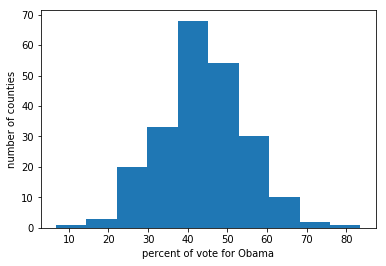

In [4]:
_ = plt.hist(df_swing['dem_share'])
_ = plt.xlabel('percent of vote for Obama')
_ = plt.ylabel('number of counties')
plt.show()

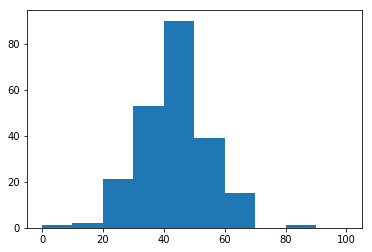

In [5]:
bin_edges = [0,10,20,30,40,50,
             60,70,80,90,100]
_ = plt.hist(df_swing['dem_share'], bins=bin_edges)
plt.show()

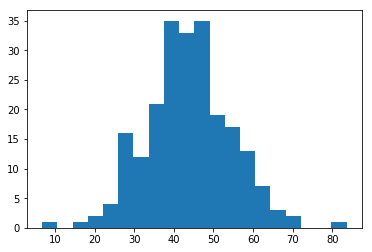

In [6]:
_ = plt.hist(df_swing['dem_share'], bins=20)
plt.show()

In [7]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


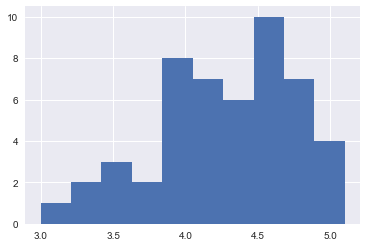

In [8]:
# Set default Seaborn style
sns.set()

# Plot histogram of versicolor petal lengths
versicolor_petal_length = df[df.species=='versicolor']['petal_length']
plt.hist(versicolor_petal_length)

# Show histogram
plt.show()

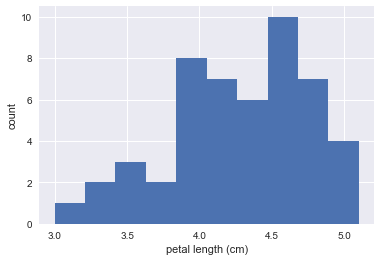

In [9]:
# Plot histogram of versicolor petal lengths
_ = plt.hist(versicolor_petal_length)

# Label axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')

# Show histogram
plt.show()


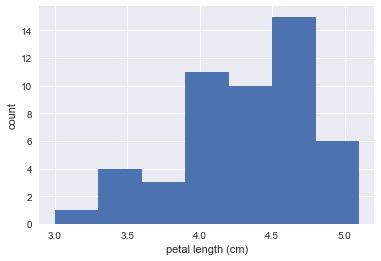

In [10]:
# Import numpy
import numpy as np

# Compute number of data points: n_data
n_data = len(versicolor_petal_length)

# Number of bins is the square root of number of data points: n_bins
n_bins = np.sqrt(n_data)

# Convert number of bins to integer: n_bins
n_bins = int(n_bins)

# Plot the histogram
_ = plt.hist(versicolor_petal_length, bins=n_bins)

# Label axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')

# Show histogram
plt.show()

### BEE SWARM PLOTS

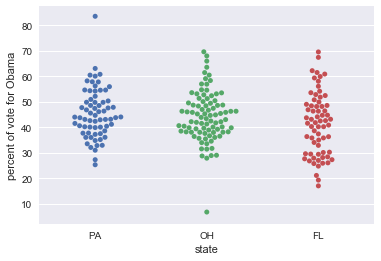

In [11]:
sns.swarmplot(x='state',y='dem_share',data=df_swing)
_ = plt.xlabel('state')
_ = plt.ylabel('percent of vote for Obama')
plt.show()

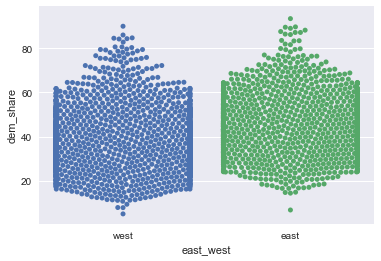

In [12]:
sns.swarmplot(x='east_west',y='dem_share',data=df_all_states)
plt.show()

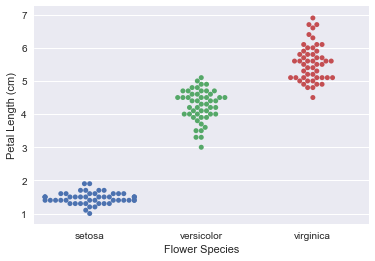

In [13]:
# Create bee swarm plot with Seaborn's default settings
sns.swarmplot(x='species',y='petal_length',data=df)

# Label the axes
plt.xlabel('Flower Species')
plt.ylabel('Petal Length (cm)')

# Show the plot
plt.show()

### ECDFs

In [14]:
# Empirical cumulative distribution functions

In [15]:
x=np.sort(df_swing['dem_share'])

In [16]:
y=np.arange(1,len(x)+1)/len(x)

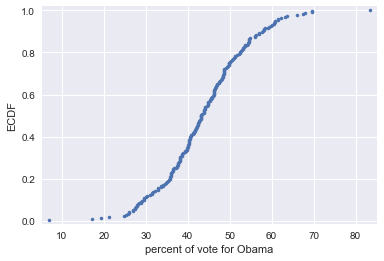

In [17]:
_ = plt.plot(x,y,marker='.',linestyle='none')
_ = plt.xlabel('percent of vote for Obama')
_ = plt.ylabel('ECDF')
plt.margins(0.02)
plt.show()

In [18]:
dem_share_PA = np.sort(df_swing['dem_share'][df_swing.state=='PA'])
dem_share_OH = np.sort(df_swing['dem_share'][df_swing.state=='OH'])
dem_share_FL = np.sort(df_swing['dem_share'][df_swing.state=='FL'])

In [19]:
y1=np.arange(1,len(dem_share_PA)+1)/len(dem_share_PA)
y2=np.arange(1,len(dem_share_OH)+1)/len(dem_share_OH)
y3=np.arange(1,len(dem_share_FL)+1)/len(dem_share_FL)

No handles with labels found to put in legend.


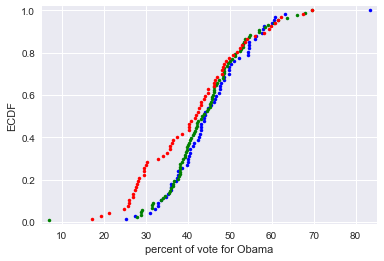

In [20]:
_ = plt.plot(dem_share_PA,y1,marker='.',linestyle='none',color='blue')
_ = plt.plot(dem_share_OH,y2,marker='.',linestyle='none',color='green')
_ = plt.plot(dem_share_FL,y3,marker='.',linestyle='none',color='red')
_ = plt.xlabel('percent of vote for Obama')
_ = plt.ylabel('ECDF')
_ = plt.legend(loc='lower right')
plt.margins(0.02)
plt.show()

In [21]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

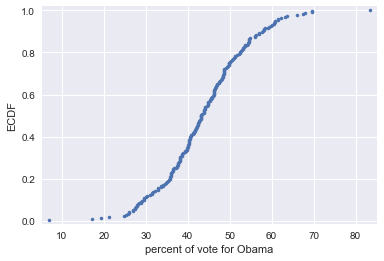

In [22]:
a,b = ecdf(df_swing['dem_share'])
_ = plt.plot(a,b,marker='.',linestyle='none')
_ = plt.xlabel('percent of vote for Obama')
_ = plt.ylabel('ECDF')
plt.margins(0.02)
plt.show()

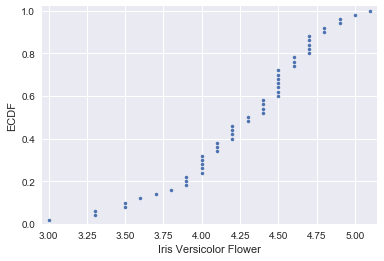

In [23]:
# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(versicolor_petal_length)

# Generate plot
_ = plt.plot(x_vers,y_vers,marker='.',linestyle='none')

# Make the margins nice
plt.margins(0.02)

# Label the axes
_ = plt.xlabel('Iris Versicolor Flower')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()


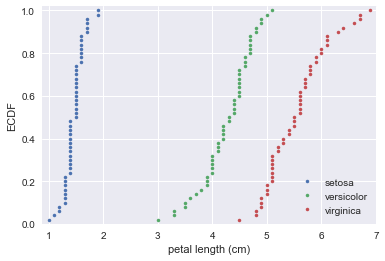

In [24]:
setosa_petal_length = df[df.species=='setosa']['petal_length']
versicolor_petal_length = df[df.species=='versicolor']['petal_length']
virginica_petal_length = df[df.species=='virginica']['petal_length']

# Compute ECDFs
x_set, y_set = ecdf(setosa_petal_length)
x_vers, y_vers = ecdf(versicolor_petal_length)
x_virg, y_virg = ecdf(virginica_petal_length)

# Plot all ECDFs on the same plot
_ = plt.plot(x_set,y_set,marker='.',linestyle='none')
_ = plt.plot(x_vers,y_vers,marker='.',linestyle='none')
_ = plt.plot(x_virg,y_virg,marker='.',linestyle='none')

# Make nice margins
plt.margins(0.02)

# Annotate the plot
plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Summary Statistics

In [39]:
dem_share_PA = np.sort(df_swing['dem_share'][df_swing.state=='PA'])
dem_share_OH = np.sort(df_swing['dem_share'][df_swing.state=='OH'])
dem_share_FL = np.sort(df_swing['dem_share'][df_swing.state=='FL'])

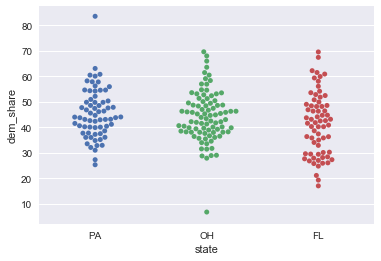

In [40]:
sns.swarmplot(x='state',y='dem_share',data=df_swing)
plt.show()

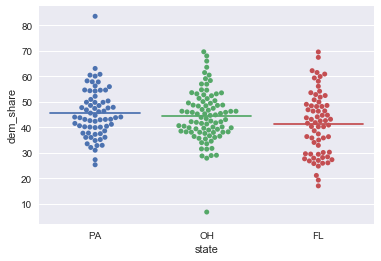

In [41]:
px = sns.swarmplot(x='state',y='dem_share',data=df_swing)
px.plot([-0.4,0.4],
        [np.mean(dem_share_PA),
         np.mean(dem_share_PA)])
px.plot([0.6,1.4],
        [np.mean(dem_share_OH),
         np.mean(dem_share_OH)])
px.plot([1.6,2.4],
        [np.mean(dem_share_FL),
         np.mean(dem_share_FL)])
plt.show()

In [42]:
np.mean(dem_share_PA)

45.47641791044776

In [43]:
dem_share_UT = df_all_states.loc[df_all_states.state=='UT']
dem_share_UT.head()

,state,county,total_votes,dem_votes,rep_votes,other_votes,dem_share,east_west
804,UT,Cache County,41332,10294,29127,1911,26.12,west
806,UT,Rich County,1006,154,831,21,15.64,west
809,UT,Box Elder County,19058,3311,15228,519,17.86,west
917,UT,Weber County,73394,25666,45885,1843,35.87,west
931,UT,Morgan County,4161,689,3311,161,17.23,west


In [44]:
UT_mean = np.mean(dem_share_UT.dem_share)
UT_median = np.median(dem_share_UT.dem_share)
print(UT_mean, UT_median)

27.61103448275862 22.47


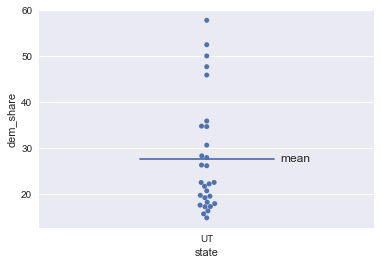

In [45]:
px = sns.swarmplot(x='state',y='dem_share',data=dem_share_UT);
px.plot([-0.2,0.2],[UT_mean,UT_mean])
px.text(0.22,UT_mean-0.5,'mean')
plt.show()

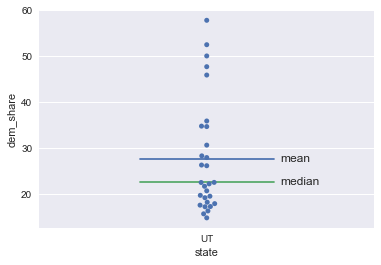

In [46]:
px = sns.swarmplot(x='state',y='dem_share',data=dem_share_UT);
px.plot([-0.2,0.2],[UT_mean,UT_mean])
px.text(0.22,UT_mean-0.5,'mean')
px.plot([-0.2,0.2],[UT_median,UT_median])
px.text(0.22,UT_median-0.5,'median')
plt.show()

### Percentiles, outliers, box plots

In [47]:
np.percentile(df_swing['dem_share'], [25, 50, 75])

array([37.3025, 43.185 , 49.925 ])

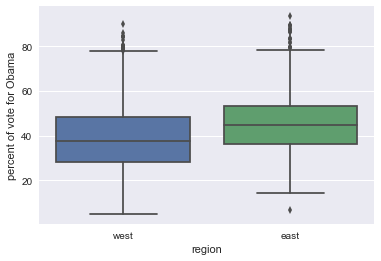

In [48]:
_ = sns.boxplot(x='east_west', y='dem_share',data=df_all_states)
_ = plt.xlabel('region')
_ = plt.ylabel('percent of vote for Obama')
plt.show()

In [49]:
# Computing percentiles
# Specify array of percentiles: percentiles
percentiles = np.array([2.5,25,50,75,97.5])

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(versicolor_petal_length,percentiles)

# Print the result
print(ptiles_vers)

[3.3    4.     4.35   4.6    4.9775]


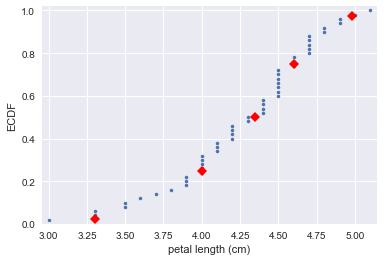

In [50]:
# Comparing Percentiles to ECDF
_ = plt.plot(x_vers, y_vers, '.')
plt.margins(0.02)
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_vers, percentiles/100, marker='D', color='red',
         linestyle='none')

# Show the plot
plt.show()

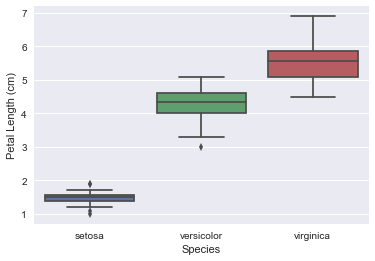

In [51]:
# Box-and-whisker plot
# Create box plot with Seaborn's default settings
sns.set()
sns.boxplot(x='species',y='petal_length',data=df)

# Label the axes
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')

# Show the plot
plt.show()

### VARIANCE AND STANDARD DEVIATION

In [52]:
np.var(dem_share_FL)

147.44278618846067

In [53]:
np.std(dem_share_FL), np.sqrt(np.var(dem_share_FL))

(12.142602117687158, 12.142602117687158)

In [55]:
# Computing the Variance
# Array of differences to mean: differences
differences = versicolor_petal_length - np.mean(versicolor_petal_length)

# Square the differences: diff_sq
diff_sq = differences ** 2

# Compute the mean square difference: variance_explicit
variance_explicit = np.mean(diff_sq)

# Compute the variance using NumPy: variance_np
variance_np = np.var(versicolor_petal_length)

# Print the results
print(variance_explicit, variance_np)

0.21640000000000012 0.21640000000000012


In [56]:
# Compute the variance: variance
variance = np.var(versicolor_petal_length)

# Print the square root of the variance
print(np.sqrt(variance))

# Print the standard deviation
print(np.std(versicolor_petal_length))

0.4651881339845204
0.4651881339845204


### Covariance and Pearson correlation coefficient

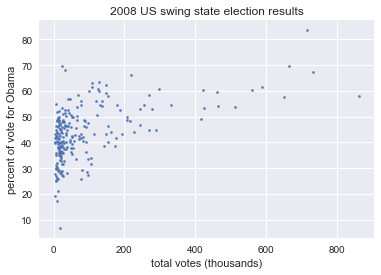

In [57]:
sns.set()
plt.scatter(x=df_swing['total_votes']/1000,y='dem_share',data=df_swing,
            s=20,marker='.')
plt.xlabel('total votes (thousands)')
plt.ylabel('percent of vote for Obama')
plt.title('2008 US swing state election results')
plt.show()

In [59]:
versicolor_petal_length = df[df.species=='versicolor']['petal_length']
versicolor_petal_width = df[df.species=='versicolor']['petal_width']

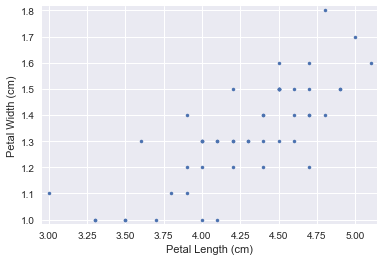

In [60]:
# Make a scatter plot
_ = plt.plot(versicolor_petal_length,versicolor_petal_width,
             marker='.',linestyle='none')

# Set margins
plt.margins(0.02)

# Label the axes
_ = plt.xlabel('Petal Length (cm)')
_ = plt.ylabel('Petal Width (cm)')

# Show the result
plt.show()

In [61]:
# Computing the Covariance

In [62]:
# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov(versicolor_petal_length, versicolor_petal_width)

# Print covariance matrix
print(covariance_matrix)

# Extract covariance of length and width of petals: petal_cov
petal_cov = covariance_matrix[0,1]

# Print the length/width covariance
print(petal_cov)

[[0.22081633 0.07310204]
 [0.07310204 0.03910612]]
0.07310204081632653


In [63]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r = pearson_r(versicolor_petal_length,versicolor_petal_width)

# Print the result
print(r)


0.7866680885228169
